In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#-- Importing dataset --#

df_raw = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Lobbist data/Lobbyist_Compensation_and_Expenses_by_Source copy.csv')

In [3]:
df_raw.head()

,filer_name,funding_source_name,receipt_date,net_total
0,MICHAEL V SCHWISOW,COLUMBIA BASIN DEVELOPMENT LEAGUE,8/4/23,4166.66
1,MICHAEL V SCHWISOW,Washington Winegrowers Association,8/4/23,2500.00
2,MICHAEL V SCHWISOW,WA ST WATER RESOURCES ASSN,8/4/23,5313.41
3,MICHAEL V SCHWISOW,MICHAEL V SCHWISOW (Self),8/4/23,0.00
4,MARY STAPLES,National Association of Chain Drug Stores,8/4/23,1000.00


In [4]:
#-- Inspecting the shape --#
df_raw.shape

(265988, 4)

In [5]:
#-- Dropping all rows with "net_total" = "0" --#
df = df_raw[df_raw['net_total'] != 0]
df.head()

,filer_name,funding_source_name,receipt_date,net_total
0,MICHAEL V SCHWISOW,COLUMBIA BASIN DEVELOPMENT LEAGUE,8/4/23,4166.66
1,MICHAEL V SCHWISOW,Washington Winegrowers Association,8/4/23,2500.00
2,MICHAEL V SCHWISOW,WA ST WATER RESOURCES ASSN,8/4/23,5313.41
4,MARY STAPLES,National Association of Chain Drug Stores,8/4/23,1000.00
6,John Ulric Seng,Spark Northwest,8/4/23,17.80


In [6]:
total_rows = len(df)
missing_percentage_per_column = {}

for column in df.columns:
    missing_count = df[column].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    missing_percentage_per_column[column] = missing_percentage

print(missing_percentage_per_column)

{'filer_name': 0.0, 'funding_source_name': 0.0, 'receipt_date': 0.0, 'net_total': 0.0}


In [7]:
#-- Inspecting the shape of the cleaned dataset --#

df.shape

(167755, 4)

In [8]:
#-- The dataset was 36% redudancy --#

(265988 - 167755)/ 265988

0.3693136532475149

In [9]:
df[['day', 'month', 'year']] = df['receipt_date'].str.split('/', expand=True)

# Convert day, month, and year columns to integers
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df.drop(columns=['receipt_date'], inplace=True)
df.head()

,filer_name,funding_source_name,net_total,day,month,year
0,MICHAEL V SCHWISOW,COLUMBIA BASIN DEVELOPMENT LEAGUE,4166.66,8,4,23
1,MICHAEL V SCHWISOW,Washington Winegrowers Association,2500.00,8,4,23
2,MICHAEL V SCHWISOW,WA ST WATER RESOURCES ASSN,5313.41,8,4,23
4,MARY STAPLES,National Association of Chain Drug Stores,1000.00,8,4,23
6,John Ulric Seng,Spark Northwest,17.80,8,4,23


# Now we are done cleaning, lets move on to descriptive statistics.

# Exploring variables distrobutions

In [10]:
df.describe()

,net_total,day,month,year
count,1.677550e+05,167755.000000,167755.000000,167755.000000
mean,3.782182e+03,5.983804,13.306948,20.109398
std,1.305959e+04,3.599968,6.844778,2.379234
min,-7.000000e+03,1.000000,1.000000,14.000000
25%,1.160850e+03,3.000000,9.000000,18.000000
50%,2.900000e+03,6.000000,13.000000,20.000000
75%,4.750000e+03,9.000000,16.000000,22.000000
max,2.011829e+06,12.000000,31.000000,24.000000


# How many unique Lobbyists are in Washington State? 

In [42]:
unique_count = df['filer_name'].nunique()
print("Unique count of filer_name:", unique_count)


Unique count of filer_name: 1906


# How many unique entities fund the lobbyist? 

In [40]:
unique_count2 = df['funding_source_name'].nunique()
print("Unique count of filer_name:", unique_count2)


Unique count of filer_name: 3682


# What is the lobbyist to entity ratio?

1.9 entites to every 1 lobbyist

In [43]:
#-- Entities / Lobbyist --#

3682/1906

1.931794333683106

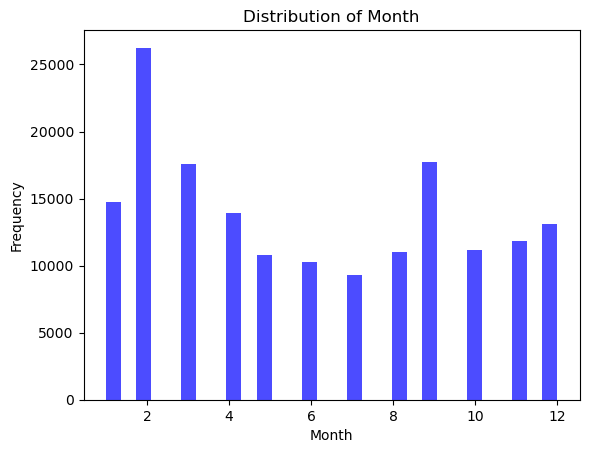

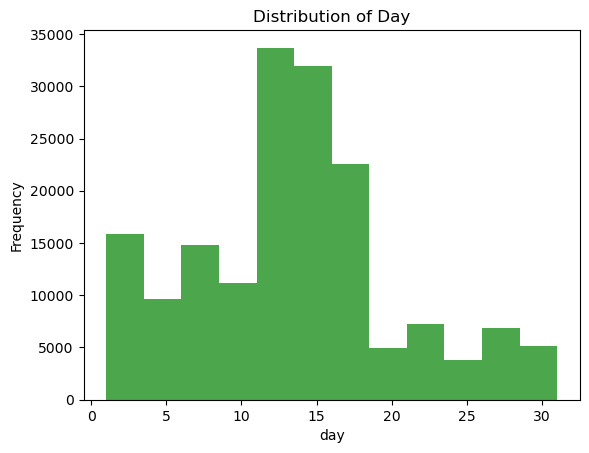

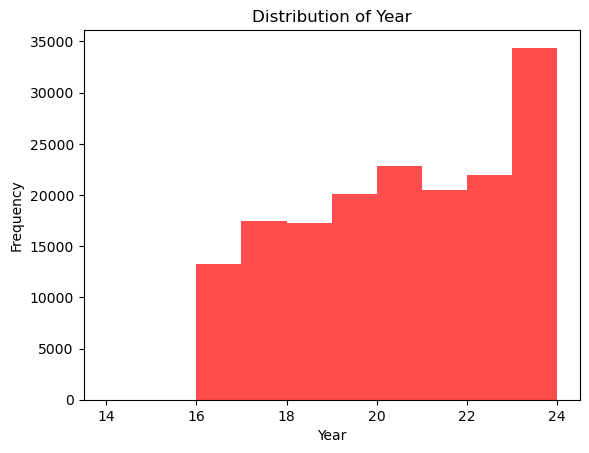

In [41]:
# Plot histogram for the 'day' column
plt.hist(df['day'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Month')
plt.show()

# Plot histogram for the 'month' column
plt.hist(df['month'], bins=12, color='green', alpha=0.7)
plt.xlabel('day')
plt.ylabel('Frequency')
plt.title('Distribution of Day')
plt.show()

# Plot histogram for the 'year' column
plt.hist(df['year'], bins=range(df['year'].min(), df['year'].max() + 1), color='red', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')
plt.show()

<AxesSubplot:>

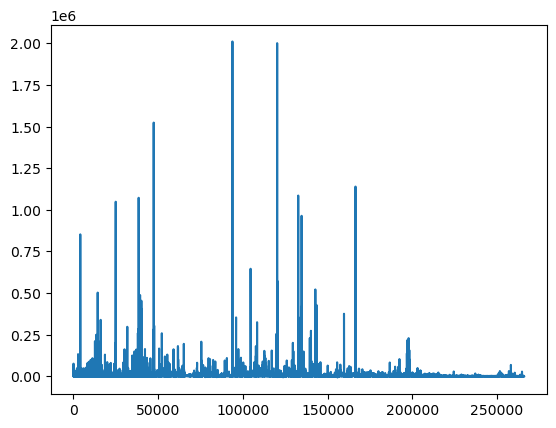

In [12]:
#-- Now Plotting the distrobution of net_total --#
# Convert 'net_total' column to integers
net_total_int = df['net_total'].astype(int)
net_total_int.plot()

In [13]:
top_20_funding_sources = df.groupby('funding_source_name')['net_total'].sum().nlargest(20)
print(top_20_funding_sources)


funding_source_name
SEIU 775                               10592906.82
Western States Petroleum Assn.          9337209.56
AMAZON.COM SERVICES LLC                 7177311.68
WA FEDERATION OF STATE EMPLOYEES        6930649.19
WA ASSN OF REALTORS                     5701452.88
PUGET SOUND ENERGY INC                  5594113.97
SEIU HEALTHCARE 1199 NW                 5108715.87
WA EDUCATION ASSN                       4912883.17
MICROSOFT CORP                          4634751.97
WA HEALTH CARE ASSN                     4282876.06
ASSN OF WA BUSINESS                     3931784.78
PUBLIC SCHOOL EMPLOYEES OF WA           3703412.68
WA ST ASSN FOR JUSTICE                  3569294.54
VULCAN INC                              3447717.84
WA ST HOSPITAL ASSN                     3136115.06
PHARMACEUTICAL RSRCH/MFG OF AMERICA     3085191.54
COMMUNITY HEALTH NETWORK OF WA          3046481.12
Delta Dental of WA                      3006016.80
AVISTA CORP                             2916304.10
BOEING     

In [14]:
top_20_lobbyist = df.groupby('filer_name')['net_total'].sum().nlargest(20)
print(top_20_lobbyist)

filer_name
GORDON THOMAS HONEYWELL GOV AFFAIRS*    23728550.86
CARNEY BADLEY SPELLMAN*                 12202259.76
Insight Strategic Partners LLC          11408990.28
MCBRIDE PUBLIC AFFAIRS LLC*             11004199.24
STAUFFACHER COMMUNICATIONS*             10414948.06
ALLIANCES NORTHWEST*                     9313562.92
CASCADE GOVT AFFAIRS LLC*                8595135.59
GANO & ASSOC*                            8545286.62
STRATEGIES 360*                          8217242.27
ADAM GLICKMAN                            8206073.90
Bogard & Johnson LLC                     7522659.28
BOSWELL CONSULTING*                      7460994.14
COMMUNICO*                               6949341.43
CIVIC GROUP*                             6945002.09
CHRISTOPHERSEN INC*                      6606709.88
LISA THATCHER                            6324695.11
Ludeman Public Affairs                   5883304.33
Jessica Spiegel                          5870227.30
ROMAN M DANIELS-BROWN                    5684325.06
J

# Now going into Machine Learning

Given the variables, 'net_total' and 'year', how accurate of a model can be created with and ensemble method.

In [17]:
# Group the data by 'year' and count the instances
instances_per_year = df.groupby('year').size()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

instances_per_year_df = instances_per_year.reset_index()
instances_per_year_df.columns = ['year', 'count']

#-- Split data into features (X) and target variable (y) --#
X = instances_per_year_df[['year']]
y = instances_per_year_df['count']
instances_per_year = df.groupby('year').size()



#-- Splitting the data into train and test sets (80% train, 20% test) --#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-- Creating the Random Forest Regressor model --#
rf_regressor = RandomForestRegressor(random_state=42)

#-- Training the model --#
rf_regressor.fit(X_train, y_train)

#-- Making predictions on the test set --#
predictions = rf_regressor.predict(X_test)

#-- Calculating mean squared error --#
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 10352420.779050007


# Now exploring some of the lobbyist funding sources.

In [21]:
#-- Create a new dataset containing rows with 'funding_source_name' as "SEIU" --#
SEIU775 = df[df['funding_source_name'] == "SEIU 775"]

#-- Select only the columns ['net_total'] and 'year' --#
SEIU775 = SEIU775[['net_total', 'year']]

SEIU775

,net_total,year
637,4281.0,23
869,2335.6,23
958,2500.0,23
2146,4500.0,24
2613,4500.0,23
...,...,...
120692,1101.0,22
120694,2750.0,22
120695,2750.0,22
120701,120.0,23


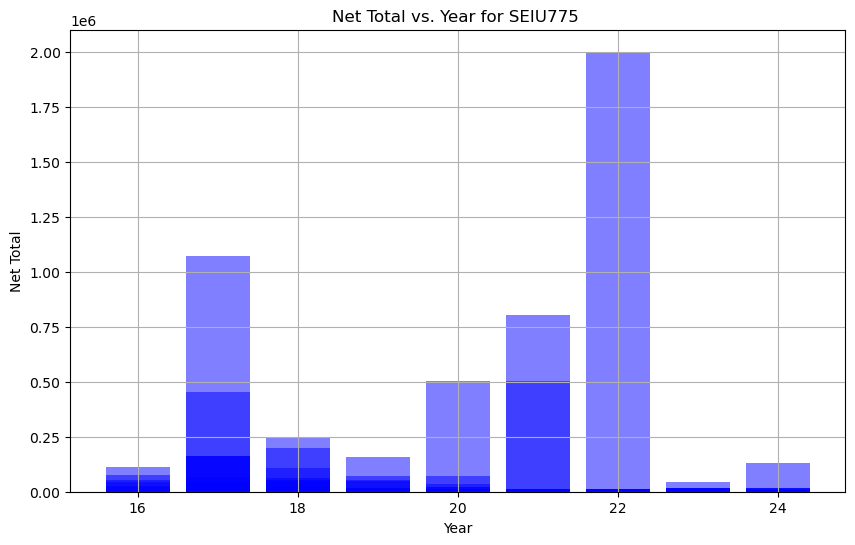

In [22]:
#-- Plotting the 'net_total' column against the 'year' column --#
plt.figure(figsize=(10, 6))
plt.bar(SEIU775['year'], SEIU775['net_total'], color='blue', alpha=0.5)
plt.title('Net Total vs. Year for SEIU775 ')
plt.xlabel('Year')
plt.ylabel('Net Total')
plt.grid(True)
plt.show()

In [23]:
WSPA = df[df['funding_source_name'] == "Western States Petroleum Assn."]
# Select only the columns ['net_total'] and 'year'
WSPA = WSPA[['net_total', 'year']]
WSPA

,net_total,year
945,2913.84,23
1813,35013.59,23
4137,852913.84,23
4900,36750.00,23
7041,36544.74,23
...,...,...
166476,15787.65,23
166477,1139983.04,23
166478,7741.52,23
166479,2913.84,23


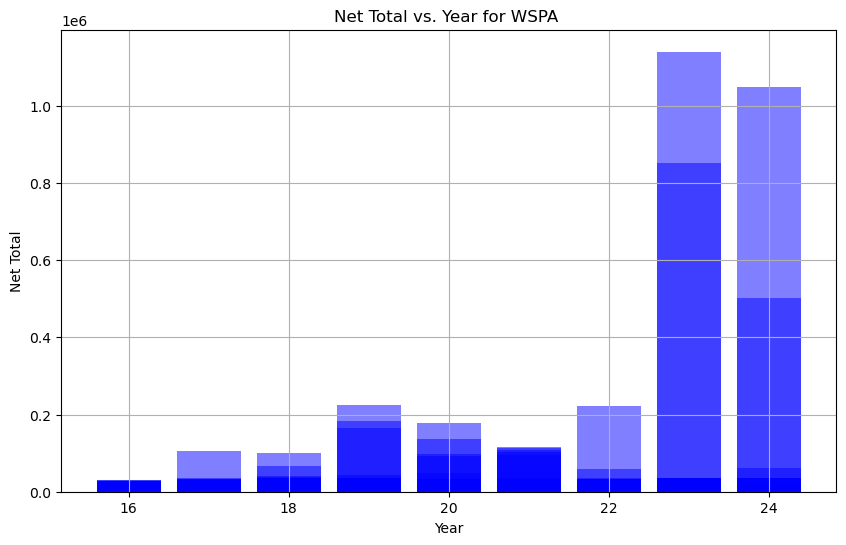

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(WSPA['year'], WSPA['net_total'], color='blue', alpha=0.5)
plt.title('Net Total vs. Year for WSPA ')
plt.xlabel('Year')
plt.ylabel('Net Total')
plt.grid(True)
plt.show()


# Exploring much money Amazon gives to lobbyist


In [25]:
amazon_df = df[df['funding_source_name'] == "AMAZON.COM SERVICES LLC"]

# Select only the columns ['net_total'] and 'year'
amazon_df = amazon_df[['net_total', 'year']]

amazon_df

,net_total,year
147,76131.18,23
1881,1400.00,23
1979,2500.00,23
2219,17916.66,23
2847,4500.00,23
...,...,...
47813,3000.00,22
47814,3000.00,22
47815,3000.00,22
47816,3000.00,23


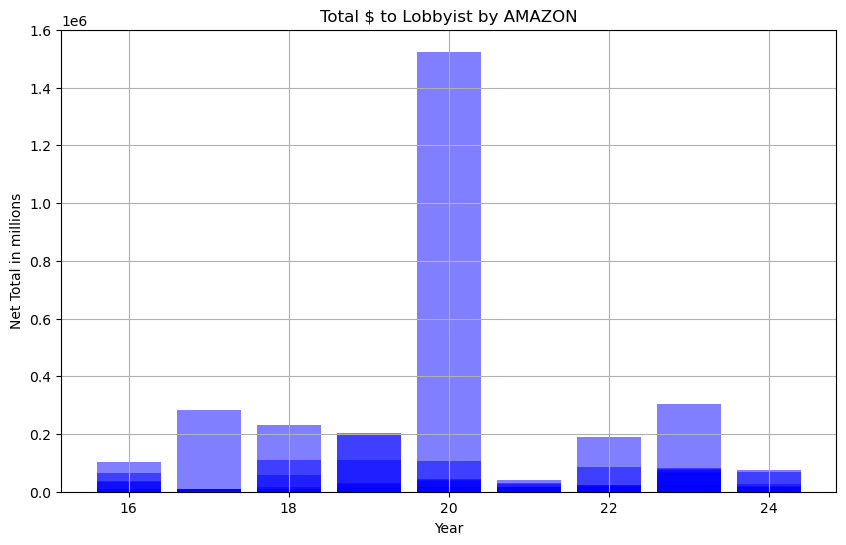

In [26]:
#-- Plotting the 'net_total' column against the 'year' column --#
plt.figure(figsize=(10, 6))
plt.bar(amazon_df['year'], amazon_df['net_total'], color='blue', alpha=0.5)
plt.title('Total $ to Lobbyist by AMAZON')
plt.xlabel('Year')
plt.ylabel('Net Total in millions')
plt.grid(True)
plt.show()

In [27]:

AVISTA = df[df['funding_source_name'] == "AVISTA CORP"]
# Select only the columns ['net_total'] and 'year'
AVISTA = AVISTA[['net_total', 'year']]
AVISTA

,net_total,year
591,15900.00,23
1822,8333.33,23
4045,8333.33,23
4337,17292.25,23
6037,20793.36,23
...,...,...
57036,2500.00,19
57037,5000.00,20
57038,5000.00,20
57041,7500.00,19


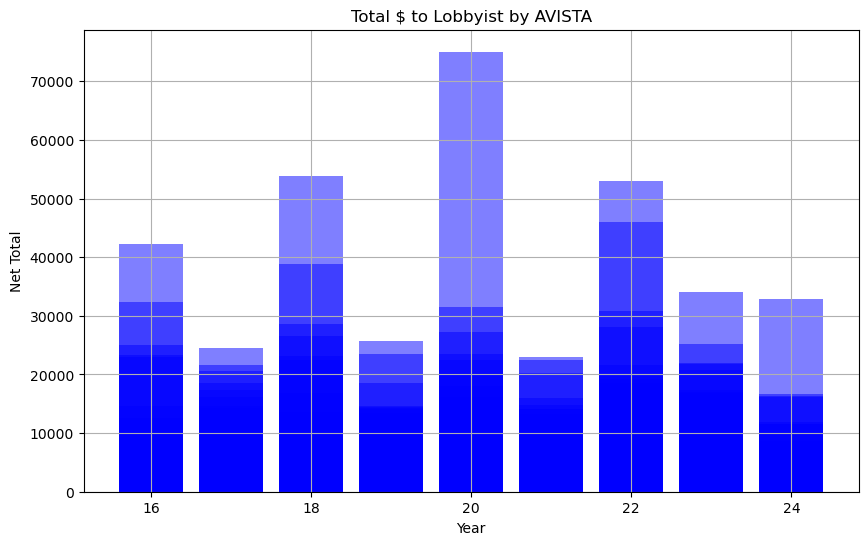

In [28]:
# Plotting the 'net_total' column against the 'year' column
plt.figure(figsize=(10, 6))
plt.bar(AVISTA['year'], AVISTA['net_total'], color='blue', alpha=0.5)
plt.title('Total $ to Lobbyist by AVISTA')
plt.xlabel('Year')
plt.ylabel('Net Total')
plt.grid(True)
plt.show()

In [29]:
#-- Create a new dataset containing rows with 'funding_source_name' as "AMAZON.COM SERVICES LLC" --#
WFSE = df[df['funding_source_name'] == "WA FEDERATION OF STATE EMPLOYEES"]

#-- Select only the columns ['net_total'] and 'year' --#
WFSE = WFSE[['net_total', 'year']]

WFSE

,net_total,year
1769,17581.83,23
1772,7705.50,23
1774,4669.22,23
1776,2952.95,23
5009,4669.22,23
...,...,...
143080,7705.50,23
143081,7705.50,23
143082,7705.50,23
143083,7705.50,23


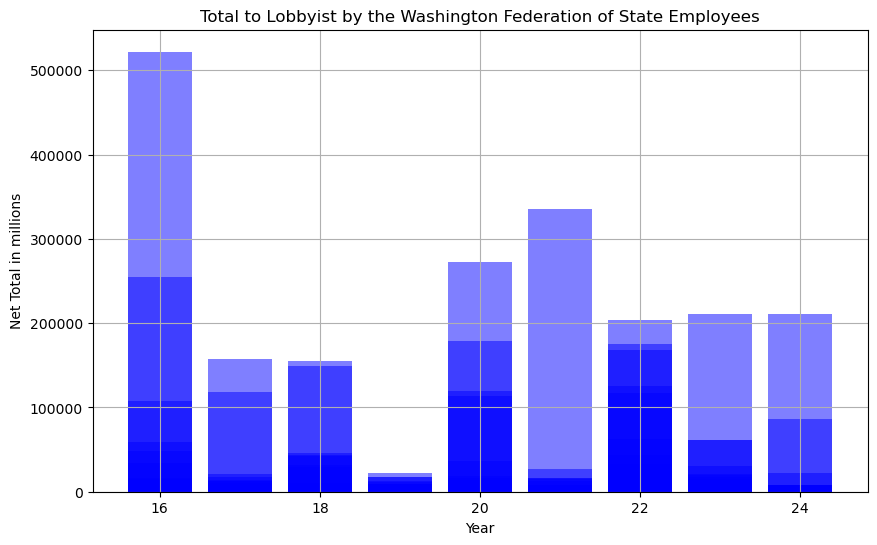

In [30]:
#-- Plotting the 'net_total' column against the 'year' column --#
plt.figure(figsize=(10, 6))
plt.bar(WFSE['year'], WFSE['net_total'], color='blue', alpha=0.5)
plt.title('Total to Lobbyist by the Washington Federation of State Employees')
plt.xlabel('Year')
plt.ylabel('Net Total in millions')
plt.grid(True)
plt.show()

# Exploring the Washington Association of Realators 

In [31]:
#-- Create a new dataset containing rows with 'funding_source_name' as "AMAZON.COM SERVICES LLC" --#
real = df[df['funding_source_name'] == "WA ASSN OF REALTORS"]

#-- Select only the columns ['net_total'] and 'year' --#
real = real[['net_total', 'year']]
real

,net_total,year
1198,8000.0,23
1871,3500.0,23
1904,4500.0,23
2228,10167.3,23
4360,33000.0,23
...,...,...
134993,3500.0,23
134994,3500.0,23
134995,3500.0,23
134996,3500.0,23


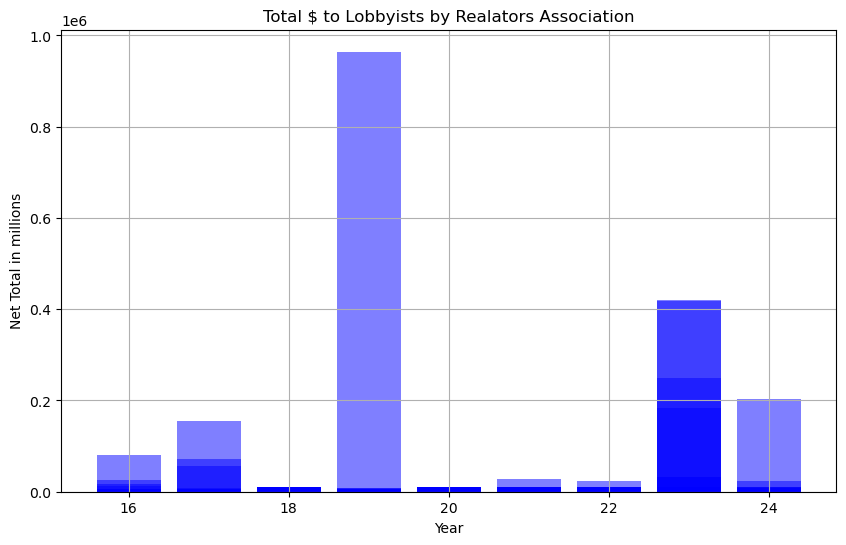

In [32]:
#-- Plotting the 'net_total' column against the 'year' column --#
plt.figure(figsize=(10, 6))
plt.bar(real['year'], real['net_total'], color='blue', alpha=0.5)
plt.title('Total $ to Lobbyists by Realators Association')
plt.xlabel('Year')
plt.ylabel('Net Total in millions')
plt.grid(True)
plt.show()

# Exploring Washigton Teachers Union 

In [33]:
#-- Create a new dataset containing rows with 'funding_source_name' as "AMAZON.COM SERVICES LLC" --#
teach = df[df['funding_source_name'] == "WA EDUCATION ASSN"]

#-- Select only the columns ['net_total'] and 'year' --#
teach = teach[['net_total', 'year']]
teach

,net_total,year
2072,88.35,23
2074,443.73,23
2078,3407.73,23
2091,1271.21,23
2093,1007.09,23
...,...,...
140499,8774.45,23
140500,9254.90,23
140501,3841.23,23
140502,1205.71,23


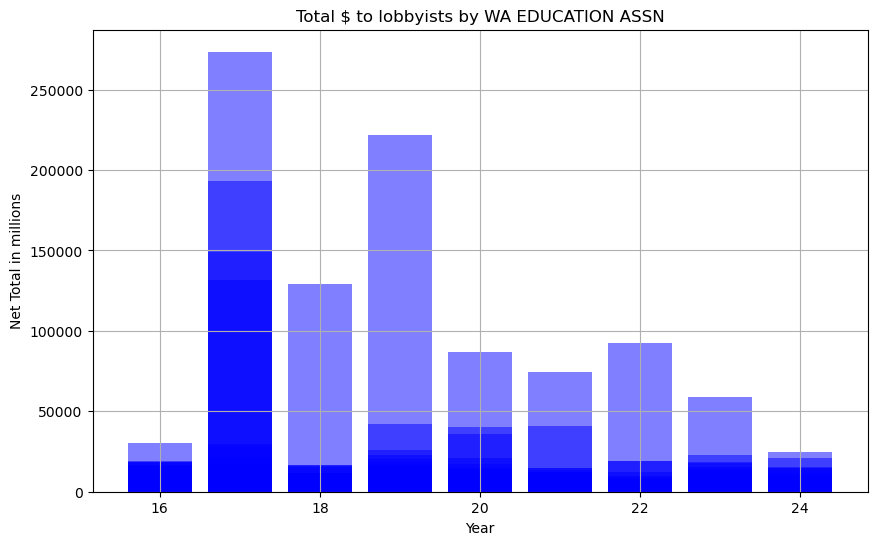

In [34]:
#-- Plotting the 'net_total' column against the 'year' column --#
plt.figure(figsize=(10, 6))
plt.bar(teach['year'], teach['net_total'], color='blue', alpha=0.5)
plt.title('Total $ to lobbyists by WA EDUCATION ASSN')
plt.xlabel('Year')
plt.ylabel('Net Total in millions')
plt.grid(True)
plt.show()

In [35]:
#-- Create a new dataset containing rows with 'funding_source_name' as "AMAZON.COM SERVICES LLC" --#
micro = df[df['funding_source_name'] == "MICROSOFT CORP"]

#-- Select only the columns ['net_total'] and 'year' --#
micro = micro[['net_total', 'year']]
micro
 

,net_total,year
162,3000.00,23
191,3010.00,23
193,11799.94,23
4004,3000.00,23
4013,8460.00,23
...,...,...
96140,2500.00,23
96141,2500.00,23
96142,5776.84,23
96143,5379.92,23


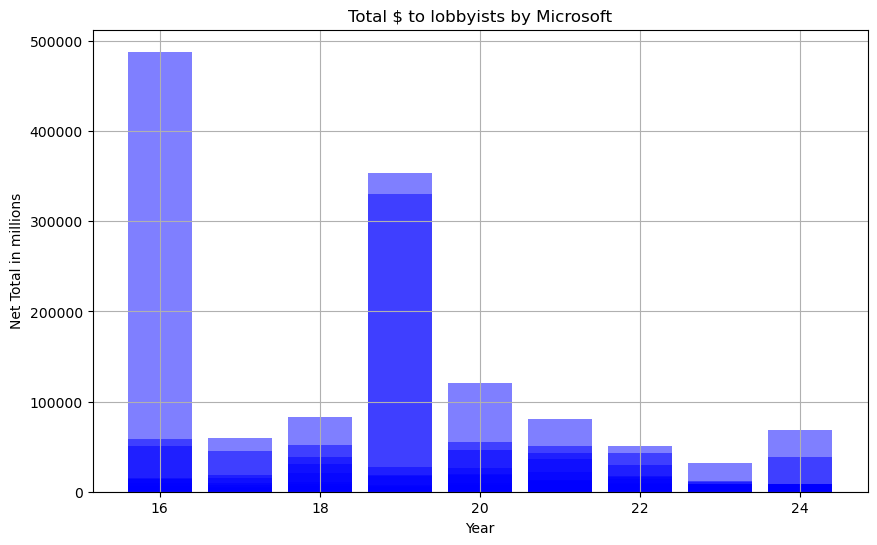

In [36]:
#-- Plotting the 'net_total' column against the 'year' column --#
plt.figure(figsize=(10, 6))
plt.bar(micro['year'], micro['net_total'], color='blue', alpha=0.5)
plt.title('Total $ to lobbyists by Microsoft')
plt.xlabel('Year')
plt.ylabel('Net Total in millions')
plt.grid(True)
plt.show()

Identified the Top 20 sources of lobbyist money State of Washington.

Identified is the Top 20 Lobbyist whom recieve money in the State of Washington.

Feburary is the highest month for lobyist donations.

The days that the money is distributed is between the 11 and the 16.

The frequency distrobution of the lobbyist contribtuions is increasing.

At the same time, the net_total is not increasing with the frequency but remaining random. 

Therefore, based on the random distrobtuion of the 'net_total', the ability to predict net_total per year is not possible and leds to accept the Null Hypthesis.
creating a Random Forest actuarial test. The analysis focuses on key variables such as 'Year', 'Net_total', 'Month', and 'Day'. Through data gathering from open-source repositories and employing data analytics tools like Python, Pandas, NumPy, and Seaborn, the study explores the relationship between independent and dependent variables. Results reveal 1,902 unique lobbyists in Washington State, top funding sources, top lobbyist recipients, peak donation months, and distribution patterns. However, despite an increasing frequency of lobbyist contributions, the 'net_total' remains random, leading to the acceptance of the null hypothesis. The findings provide insights into lobbyist money cycles and underscore the limitations of prediction using Random Forest in this context.
This study investigates the predictability of yearly lobbyist donations using a Random Forest model. The null hypothesis posits that the yearly distribution of lobbyist donations is random and unpredictable, while the alternative hypothesis suggests predictability. Leveraging a dataset sourced from Data.gov containing information on lobbyist donations from 2016 to 2024, this research aims to contribute to data analytics and taxpayer awareness by 

Final Analysis:

This study has yielded valuable insights into the dynamics of lobbyist donations in Washington State. Analysis of the dataset reveals a diverse landscape with 1,902 unique lobbyists or lobbyist organizations actively engaged in the state's political arena. Furthermore, examination of the data uncovers 3,682 unique entities funding these lobbyists, shedding light on the breadth of interests influencing political decision-making.

Identification of the top 20 sources of lobbyist money in Washington State provides clarity on the key players driving political influence. Similarly, the identification of the top 20 lobbyists who receive money underscores the interconnected nature of lobbying activities.

Analysis of donation patterns by month reveals February as the peak month for lobbyist donations, suggesting potential strategic considerations or legislative activities during this period. Moreover, a narrower window of donation distribution between the 11th and 16th of each month highlights the concentrated timing of financial contributions within each month.

Visualizations depicting the frequency distributions of select funding sources along a 'Year' timeline provide a comprehensive overview of donation trends over time. Notably, an increasing frequency distribution of lobbyist contributions is observed, indicating a growing level of lobbying activity in recent years.

However, despite the observed increase in frequency, the analysis reveals that the 'net_total' of lobbyist donations does not exhibit a corresponding increase over time. Instead, it remains random, suggesting fluctuations and inconsistencies in the overall financial contributions made by lobbyists.

As a result, the study concludes that based on the random distribution of the 'net_total', the predictive capability of a Random Forest model to forecast 'net_total' per year is limited. This finding underscores the complexity and unpredictability inherent in the realm of lobbyist donations, highlighting the challenges associated with modeling such behaviors. Despite the limitations, the study provides valuable insights into lobbyist money cycles and serves as a foundation for further research in the field of political finance and data analytics.